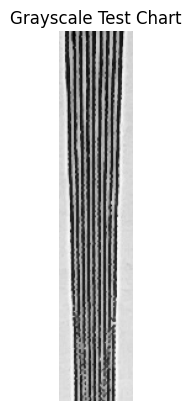

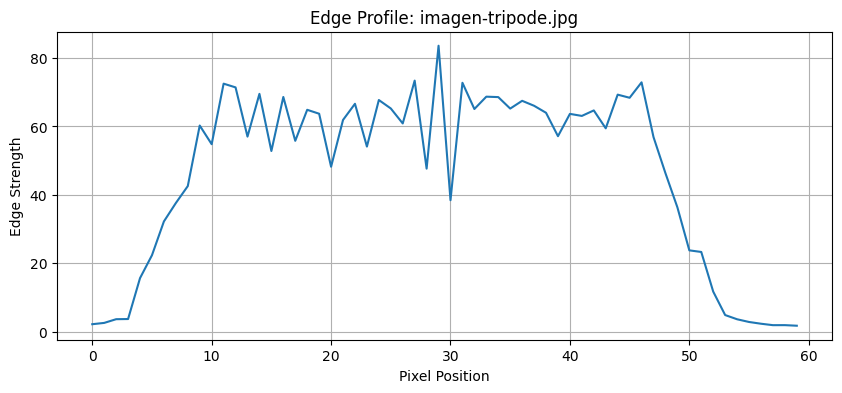

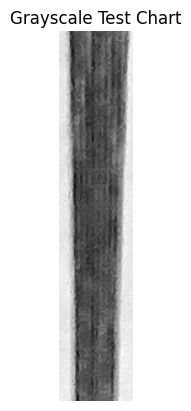

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from scipy.signal import find_peaks

def estimate_resolution(image_path, crop_coords, physical_width_mm):
    image = io.imread(image_path)
    gray = color.rgb2gray(image)

    y1, y2, x1, x2 = crop_coords
    region = gray[y1:y2, x1:x2]

    edges = filters.sobel(region)
    profile = np.sum(edges, axis=0)

    peaks, _ = find_peaks(profile, height=0.05, distance=2)
    num_line_pairs = len(peaks) // 2

    lp_per_mm = num_line_pairs / physical_width_mm

    plt.imshow(region, cmap='gray')
    plt.title("Grayscale Test Chart")
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(profile)
    plt.title(f"Edge Profile: {image_path}")
    plt.xlabel("Pixel Position")
    plt.ylabel("Edge Strength")
    plt.grid(True)
    plt.show()

    return lp_per_mm

crop_coords = (800, 1100, 1985, 2045)  # TODO: ajustar bien las coords
crop_coords_2 = (760, 1060, 1920, 1980)
physical_width_mm = 3                  # Ancho físico del área analizada

# Comparación entre cámara fija y en mano
res_fija = estimate_resolution('imagen-tripode.jpg', crop_coords, physical_width_mm)
res_mano = estimate_resolution('imagen-camara.jpg', crop_coords_2, physical_width_mm)

# Resolución comercial 
res_comercial_lpmm = 250  # TODO: ajustar con los settings de la camara

# Resultados
print(f"Resolución cámara fija: {res_fija:.2f} lp/mm")
print(f"Resolución cámara en mano: {res_mano:.2f} lp/mm")
print(f"Resolución comercial declarada: {res_comercial_lpmm:.2f} lp/mm")

# Conclusión preliminar
if res_fija > res_mano:
    print("✅ La cámara fija ofrece mayor resolución efectiva que la cámara en mano.")
else:
    print("⚠️ La cámara en mano supera o iguala la resolución de la cámara fija, lo cual puede indicar problemas en el experimento.")

print("""
Conclusiones:
""")

print("""Se puede ver que en las coordendas identificadas, la parte de la foto tomada con tripode se ve mucho mejor que la parte
tomada por la camara a mano, se ve que es mucho mas borrosa que la imagen tomada con tripode, esto se puede deber a los
movimientos involuntarios del fotografo al sacar la imagen, lo que no pasaria utilizando un tripode.

La camara es de un Motorola G54 5G que tiene una camara de 50MP, la cual calcumos seria de 250 lp/mm, la gran diferencia
entre los resultados obtenidos y las espicificaciones de la camara, se puede deber a que la lente, pudiera estar
rayada o sucia, quiza tambien involucrado que podria haber habido mala iluminacion.""")